In [1]:
#To read, write, and manipulate data sets in DataFrame format
import pandas as pd
#To split data sets into training and testing sets
from sklearn.model_selection import train_test_split
#To train linear regression models
from sklearn.linear_model import LinearRegression
#To assess the performance of models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#For data visualization
import seaborn as sns
#For data visualization
import matplotlib.pyplot as plt
#For mathematical functions
import numpy as np
#For feature scaling to the [0, 1] range.
from sklearn.preprocessing import MinMaxScaler
#To predicts using the average of k-nearest neighbors.
from sklearn.neighbors import KNeighborsRegressor
#To standardizes features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler

In [2]:
#To determine the encoding of CSV file, I use Python's chardet library.
import chardet
with open('cancer.csv', 'rb') as file:
    print(chardet.detect(file.read()))

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [3]:
#Reading from csv file
mydf = pd.read_csv('cancer.csv', encoding = 'ISO-8859-1')

In [4]:
mydf

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [5]:
#To remove the non-numeric features (#binnedinc, #geography) from dataset.
mydf = mydf.drop(columns=['binnedInc', 'Geography'])

In [6]:
#To remove the rows with missing data
mydf.dropna(inplace = True)

In [7]:
mydf

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
7,146.000000,71,183.6,404.000000,40189,20848,17.8,0.000000,51.7,50.8,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
14,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,50.6,42.5,36.5,21.4,89.038167,1.827041,2.315986,1.033625,48.188377,5.355836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,1962.667684,7,209.6,453.549422,45353,1843,11.4,0.000000,45.7,43.8,...,52.7,43.9,32.2,9.2,97.960199,0.000000,0.547264,0.995025,57.780612,4.664723
3034,1962.667684,85,184.4,453.549422,45180,35788,15.0,1900.078239,38.2,36.5,...,52.3,46.2,34.4,17.4,87.718617,3.168048,1.610355,1.893068,50.730567,7.404551
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192


In [8]:
#To check that any additional null values in the dataset
mydf.isnull().sum()

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64

In [9]:
#To describe the dataset we can check number of samples, number of features, mean and variance for each feature,and correlation matrix.

In [10]:
#To find the of samples and features
mydf.shape

(591, 32)

In [11]:
#Number of samples is 591 and number of features is 32 in the dataset

In [12]:
#To find the mean for each features.
mydf.mean()

avgAnnCount                   682.316495
avgDeathsPerYear              199.411168
TARGET_deathRate              179.090863
incidenceRate                 452.657990
medIncome                   47032.851100
popEst2015                 114552.570220
povertyPercent                 16.723181
studyPerCap                   122.729567
MedianAge                      45.985787
MedianAgeMale                  39.573266
MedianAgeFemale                42.059391
AvgHouseholdSize                2.471901
PercentMarried                 51.890186
PctNoHS18_24                   18.020305
PctHS18_24                     35.174112
PctSomeCol18_24                40.782910
PctBachDeg18_24                 6.022166
PctHS25_Over                   35.272420
PctBachDeg25_Over              13.154146
PctEmployed16_Over             54.468528
PctUnemployed16_Over            7.819459
PctPrivateCoverage             64.600846
PctPrivateCoverageAlone        48.749069
PctEmpPrivCoverage             41.534687
PctPublicCoverag

In [13]:
#The results include average values of various demographic and socioeconomic factors related to cancer death rate, providing  a framework for understanding the rate and effects of the disease. 
#The average cancer death rate per person (TARGET_deathRate) is 179.09, showing that cancer is a major health issue. 
#The average yearly number of cancer cases per 100,000 people (avgAnnCount) is 682.32, pointing to a high rate of cancer cases.

In [14]:
#To find the variance for each features.
mydf.var()

avgAnnCount                3.909673e+06
avgDeathsPerYear           5.017320e+05
TARGET_deathRate           7.438482e+02
incidenceRate              2.957316e+03
medIncome                  1.300764e+08
popEst2015                 2.543717e+11
povertyPercent             3.868039e+01
studyPerCap                1.278682e+05
MedianAge                  2.275057e+03
MedianAgeMale              2.619705e+01
MedianAgeFemale            2.560445e+01
AvgHouseholdSize           2.027195e-01
PercentMarried             4.182001e+01
PctNoHS18_24               6.168023e+01
PctHS18_24                 8.729796e+01
PctSomeCol18_24            1.217443e+02
PctBachDeg18_24            1.765149e+01
PctHS25_Over               4.706112e+01
PctBachDeg25_Over          2.735581e+01
PctEmployed16_Over         5.952752e+01
PctUnemployed16_Over       1.096550e+01
PctPrivateCoverage         1.093062e+02
PctPrivateCoverageAlone    9.841755e+01
PctEmpPrivCoverage         9.108942e+01
PctPublicCoverage          5.733322e+01


In [15]:
#High variance values in variables such as avgAnnCount and popEst2015 indicate significant differences between the data points. 
#Additionally, TARGET_deathRate is the primary variable being analyzed and represents cancer mortality rates.
#Low variance variables, such as BirthRate and PctAsian, may be less related to cancer mortality rates.

In [16]:
#To find correlation matrix
mydf.corr(method = 'pearson')

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
avgAnnCount,1.000000,0.963882,-0.128587,0.010871,0.219067,0.957520,-0.105566,0.079980,-0.026047,-0.110806,...,0.133070,0.131033,-0.164938,-0.072116,-0.138574,0.020755,0.480718,0.276332,-0.086528,-0.036560
avgDeathsPerYear,0.963882,1.000000,-0.096510,0.005936,0.189414,0.988023,-0.048667,0.086374,-0.020042,-0.136011,...,0.088625,0.105198,-0.137201,-0.019233,-0.179069,0.069639,0.486688,0.285097,-0.120332,-0.076831
TARGET_deathRate,-0.128587,-0.096510,1.000000,0.376033,-0.377156,-0.109513,0.366102,-0.033589,-0.011419,-0.026774,...,-0.322015,-0.228443,0.346525,0.388474,-0.158205,0.258829,-0.199772,-0.209761,-0.291756,-0.051311
incidenceRate,0.010871,0.005936,0.376033,1.000000,0.064140,-0.018021,-0.021349,0.094944,0.020339,-0.070816,...,0.173349,0.189013,-0.069795,-0.061571,-0.029996,0.102696,0.076300,-0.208808,-0.141188,-0.103238
medIncome,0.219067,0.189414,-0.377156,0.064140,1.000000,0.177701,-0.796091,0.115285,-0.003541,-0.079002,...,0.786730,0.757948,-0.764296,-0.733614,0.190445,-0.270956,0.465658,0.078734,0.468958,-0.079201
popEst2015,0.957520,0.988023,-0.109513,-0.018021,0.177701,1.000000,-0.039724,0.073192,-0.021496,-0.145278,...,0.081420,0.091063,-0.141193,-0.020699,-0.172378,0.055595,0.479433,0.299631,-0.097910,-0.061795
povertyPercent,-0.105566,-0.048667,0.366102,-0.021349,-0.796091,-0.039724,1.000000,-0.093313,-0.016437,-0.233281,...,-0.743404,-0.674968,0.634122,0.790520,-0.529978,0.528894,-0.168474,0.060031,-0.598793,0.024339
studyPerCap,0.079980,0.086374,-0.033589,0.094944,0.115285,0.073192,-0.093313,1.000000,-0.027249,-0.060887,...,0.142935,0.155486,-0.113575,-0.082975,0.021907,-0.017010,0.098969,0.003875,-0.051405,-0.024016
MedianAge,-0.026047,-0.020042,-0.011419,0.020339,-0.003541,-0.021496,-0.016437,-0.027249,1.000000,0.075247,...,-0.008464,-0.012627,0.034639,-0.006858,0.016302,0.018361,-0.054970,-0.017505,-0.005902,0.004128
MedianAgeMale,-0.110806,-0.136011,-0.026774,-0.070816,-0.079002,-0.145278,-0.233281,-0.060887,0.075247,1.000000,...,-0.190114,-0.217323,0.384922,0.006612,0.416602,-0.260831,-0.316228,-0.265851,0.206939,-0.037352


<AxesSubplot:>

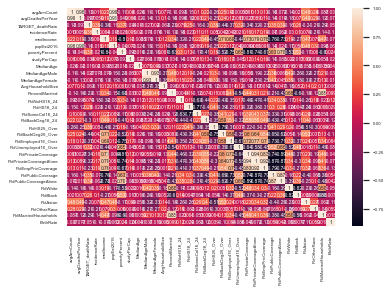

In [17]:
#To visualize the correlation matrix
sns.set(font_scale=0.4)
sns.heatmap(mydf.corr(method = 'pearson'), annot=True)

In [18]:
#In our dataset, demographic features such as 'MedianAge (the median age of county residents)' and 'BirthRate (the number of live births relative to number of women in the county)' have noticeably weak correlations with 'TARGET_deathRate'.
#This shows that the average age of population and birth rates have little effect on the 'TARGET_deathRate', which represents the mean per capita cancer mortalities in a county. 
#On the other hand, socioeconomic factors like 'PctPublicCoverageAlone (the percentage of county residents with government-provided health coverage alone)', 'povertyPercent (the percentage of the population living in poverty)' and 'medIncome(the median income per county)' show significant correlations with cancer mortality rates. 
#This implies that socioeconomic factors have a more greater influence on cancer death rates and should be considered in efforts to reduce cancer outcomes.

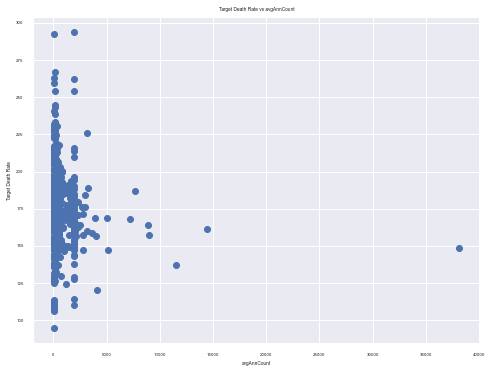

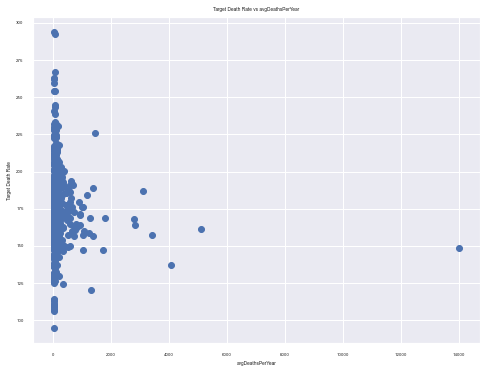

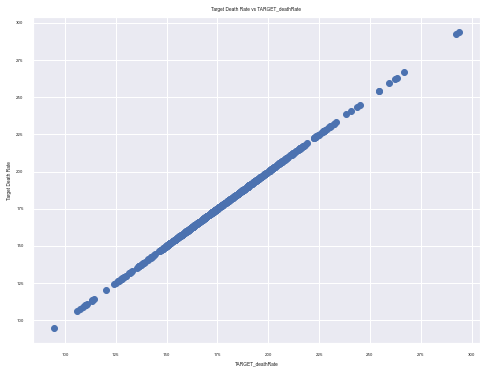

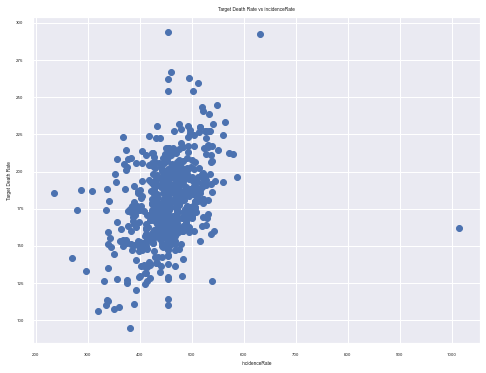

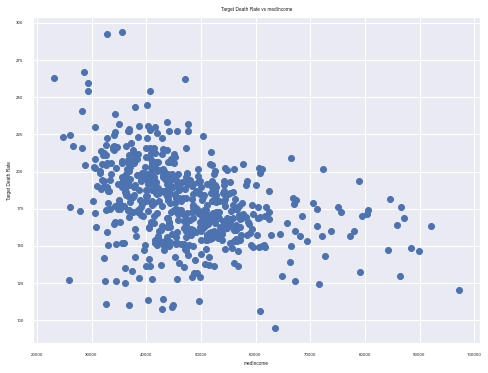

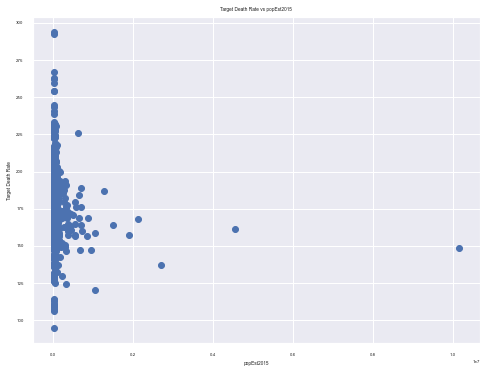

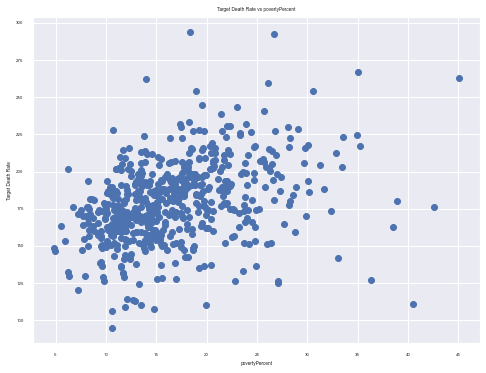

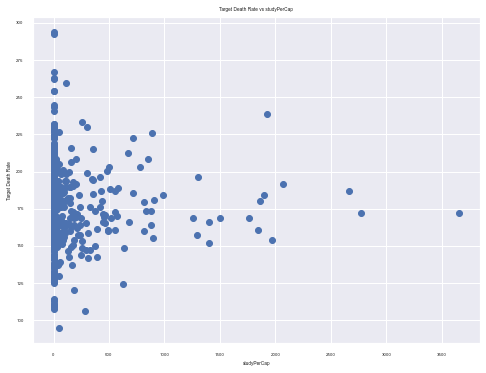

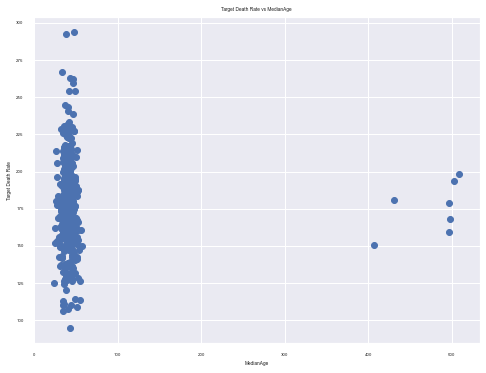

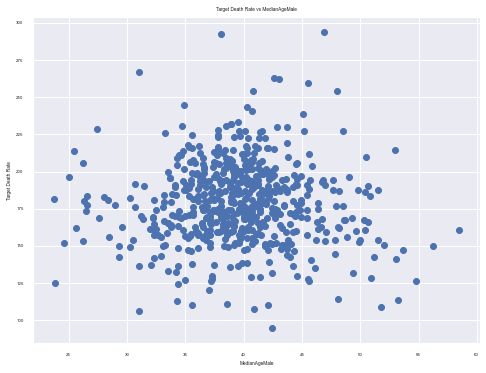

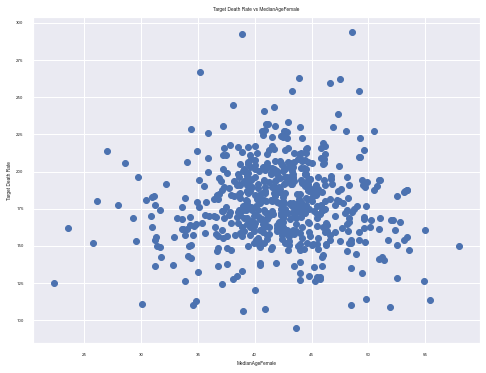

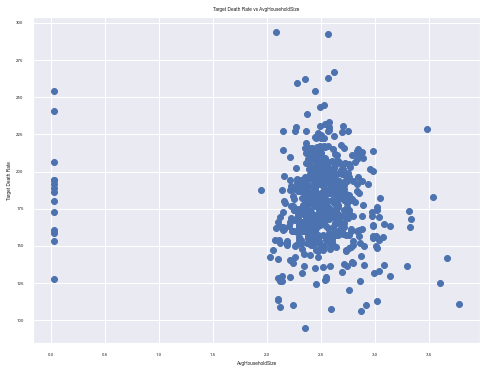

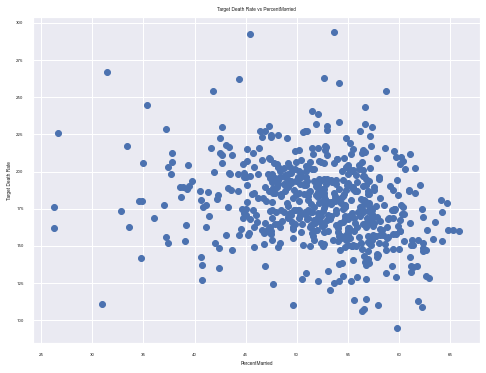

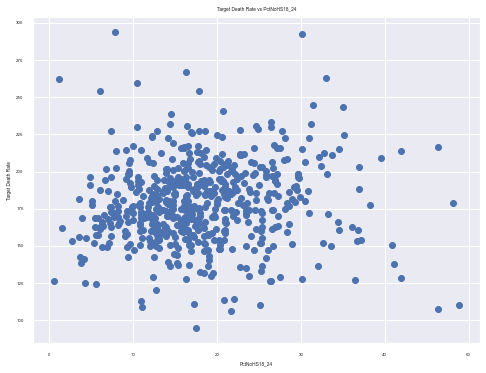

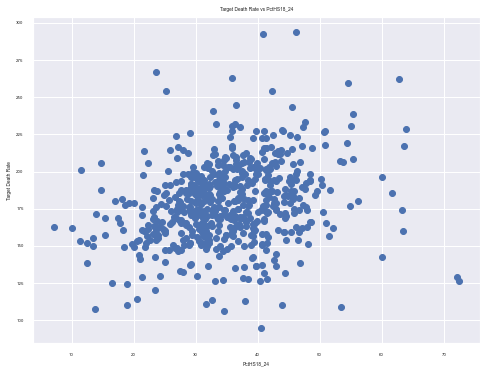

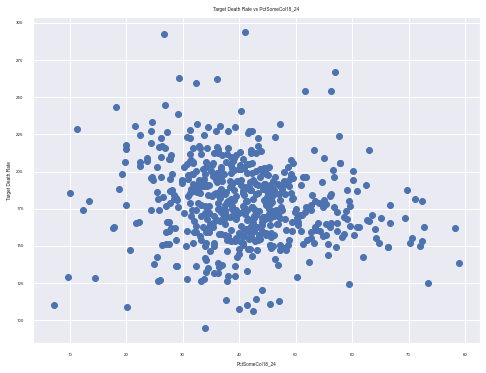

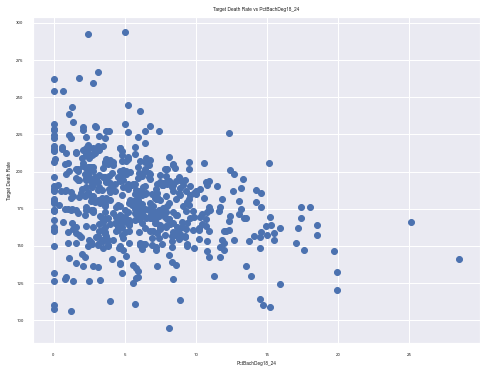

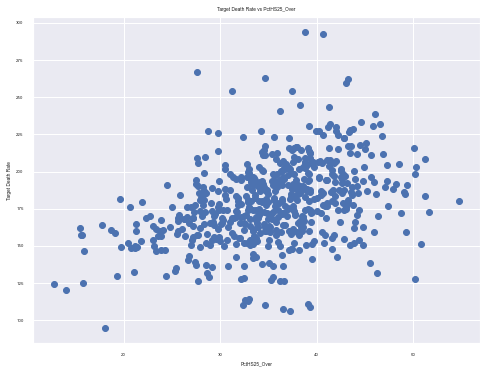

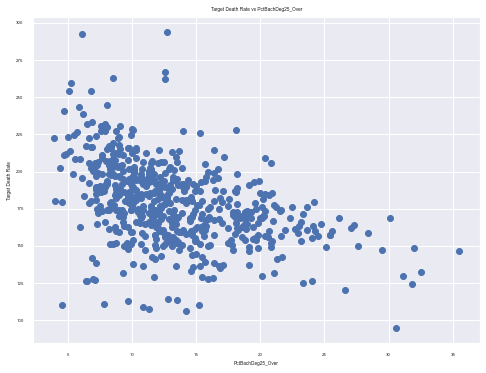

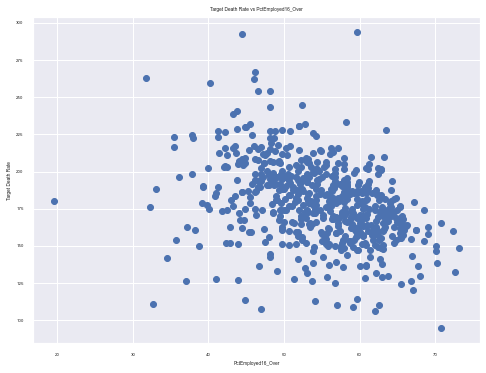

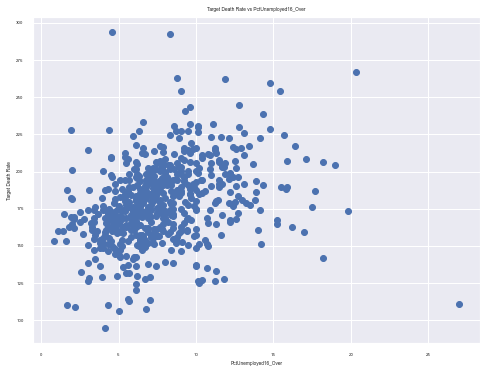

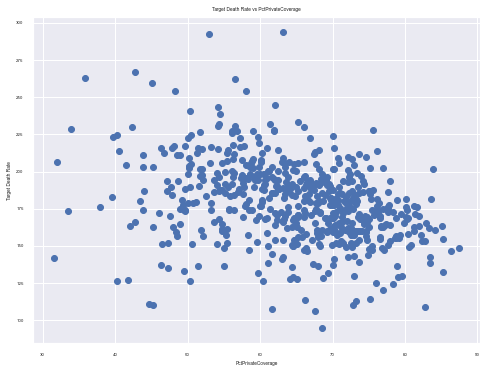

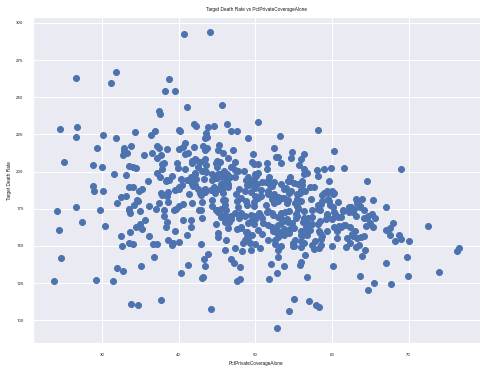

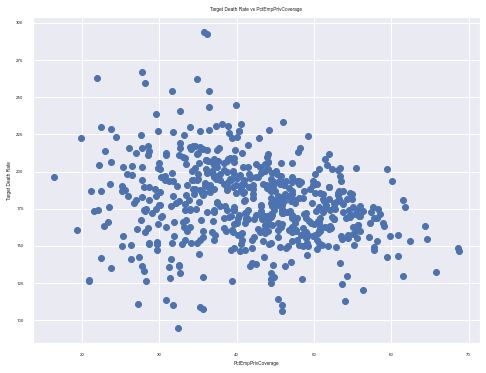

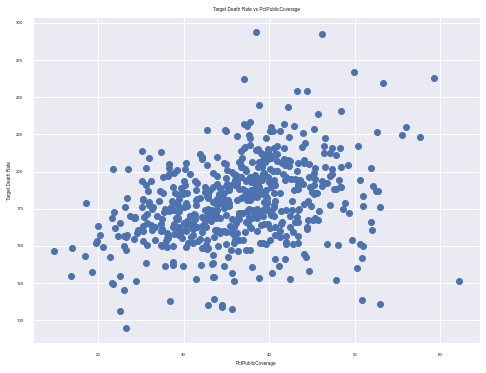

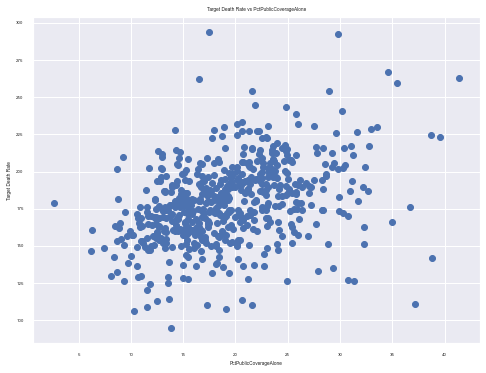

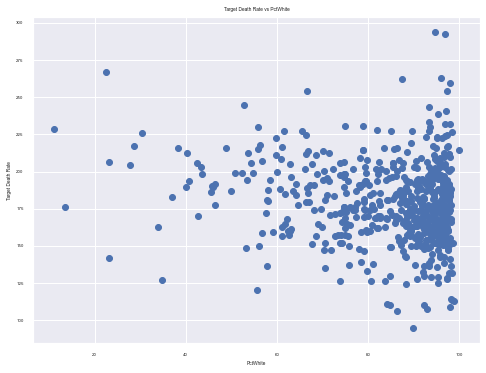

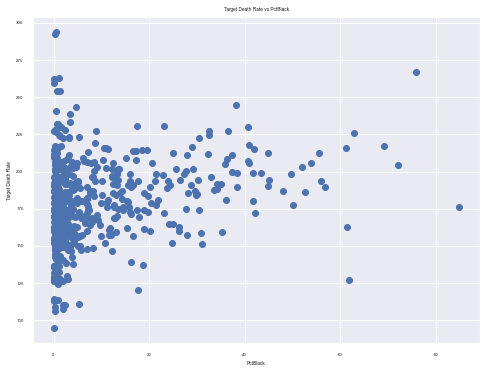

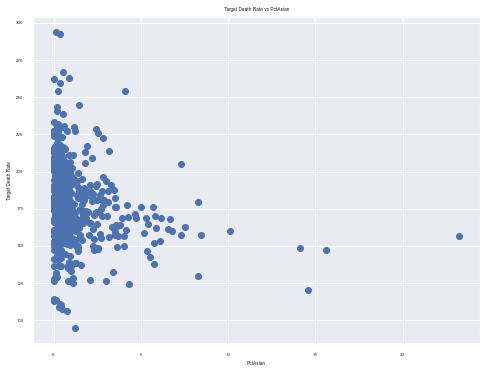

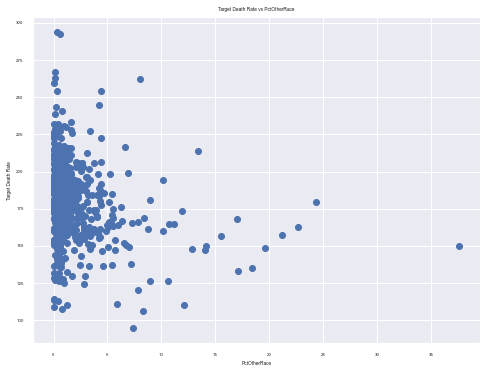

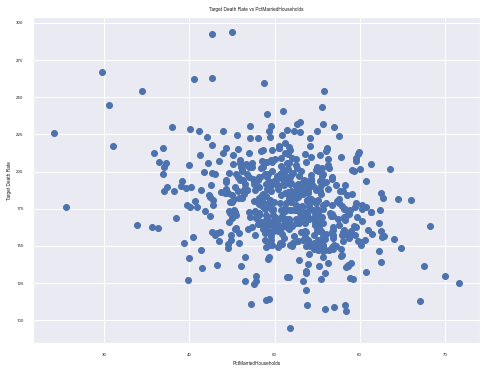

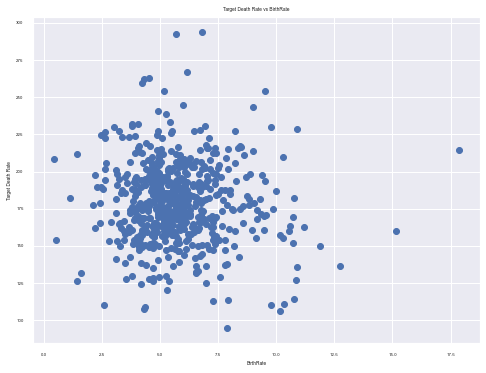

In [19]:
#To create scatter diagrams and visualize the relationship between the death rate (the target) and other features 
features = ['avgAnnCount','avgDeathsPerYear','TARGET_deathRate','incidenceRate','medIncome','popEst2015','povertyPercent','studyPerCap','MedianAge','MedianAgeMale','MedianAgeFemale','AvgHouseholdSize','PercentMarried','PctNoHS18_24','PctHS18_24','PctSomeCol18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctBlack','PctAsian','PctOtherRace','PctMarriedHouseholds','BirthRate'
]
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(mydf[feature], mydf['TARGET_deathRate'])
    plt.title(f'Target Death Rate vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Target Death Rate')
    plt.grid(True)
    plt.show()


In [20]:
#To split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(mydf[features], mydf['TARGET_deathRate'], test_size=0.20, random_state=271)

In [21]:
#The training set contains 472 samples with 32 features each.
x_train.shape

(472, 32)

In [22]:
#The testing set contains 119 samples with 32 features each.
x_test.shape

(119, 32)

In [23]:
#The entire dataset contains 591 samples with 32 features each.
mydf.shape

(591, 32)

In [24]:
#ORDİNARY LEAST SQUARES

In [25]:
#Train and evaluate the model for F = 5:

In [26]:
# Selecting 5 features to assess the impact of genetic factors on cancer mortality rates.
# 'MedianAge', 'MedianAgeMale', 'MedianAgeFemale': Chosen for their potential to reflect genetic predispositions across different age groups.
# 'PctHS18_24': Included to analyze the prevalence of genetic factors in young adults.
# 'PctBlack': Selected to examine genetic variations linked to race in cancer death rates.
# The dependent variable 'TARGET_deathRate' denotes average cancer mortality per 100,000 individuals.
features_5 =['MedianAge','MedianAgeMale','MedianAgeFemale','PctHS18_24','PctBlack']

In [27]:
#To split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(mydf[features_5], mydf['TARGET_deathRate'], test_size=0.20, random_state=271)

In [28]:
#Initialize the MinMaxScaler to normalize features to a range between 0 and 1 for uniformity.
scaler=MinMaxScaler(feature_range=(0,1))

In [29]:
#Apply the scaler to the training data to learn the scaling parameters and simultaneously transform the data to the specified range.
x_train_scaled=scaler.fit_transform(x_train)

In [30]:
#Output the scaled training data
x_train_scaled

array([[0.03253707, 0.4537037 , 0.49579832, 0.3264    , 0.07887889],
       [0.03047776, 0.40123457, 0.47058824, 0.4416    , 0.00821116],
       [0.04818781, 0.67283951, 0.70868347, 0.392     , 0.00875267],
       ...,
       [0.04798188, 0.68209877, 0.70308123, 0.5264    , 0.0146235 ],
       [0.03027183, 0.39814815, 0.47058824, 0.3888    , 0.25002792],
       [0.04427512, 0.64197531, 0.6302521 , 0.2288    , 0.00609661]])

In [31]:
#Apply the previously fitted scaler to the test data to make it the same scale as the training data.
x_test_scaled=scaler.transform(x_test)

In [32]:
#Fit model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [33]:
#Predict
y_predictions=model.predict(x_test_scaled)

In [34]:
#Loop through each prediction
for i in range(len(y_predictions)):
    print("Predicted:", y_predictions[i], "  --> Actual values:", y_test.iloc[i])

Predicted: 173.43107682428533   --> Actual values: 202.8
Predicted: 189.25776654214656   --> Actual values: 206.6
Predicted: 175.22987675402533   --> Actual values: 168.2
Predicted: 176.7159831000534   --> Actual values: 168.7
Predicted: 181.46867854408328   --> Actual values: 158.6
Predicted: 168.9388997858248   --> Actual values: 169.2
Predicted: 163.62243327000837   --> Actual values: 160.8
Predicted: 174.43349620121685   --> Actual values: 190.0
Predicted: 190.00028988364596   --> Actual values: 196.0
Predicted: 166.7597508672408   --> Actual values: 163.3
Predicted: 177.42236386022276   --> Actual values: 172.2
Predicted: 179.42046148379103   --> Actual values: 198.4
Predicted: 171.79325287822456   --> Actual values: 151.9
Predicted: 188.09171741846762   --> Actual values: 177.3
Predicted: 161.85527678662626   --> Actual values: 160.5
Predicted: 186.16394144405155   --> Actual values: 191.8
Predicted: 202.0525022062415   --> Actual values: 266.7
Predicted: 169.6628863870204   --> 

In [35]:
#For test score
score=model.score(x_test_scaled,y_test)
score

0.12449979644018871

In [36]:
#For train score
score_train=model.score(x_train_scaled,y_train)
score_train

0.13268926068382259

In [37]:
#For mean squared error
mse = mean_squared_error(y_test,y_predictions)
mse

588.1585872551132

In [38]:
#For mean absolute error
mae = mean_absolute_error(y_test,y_predictions)
mae

18.470025588763963

In [39]:
#For R2 score
score= r2_score(y_test,y_predictions)
score

0.12449979644018871

In [40]:
#The model performs poorly on both, scoring approximately 0.1249 on the test set and 0.1327 on the training set. 
#The close scores show that the problem is not overfitting but rather the model's poor prediction performance.
#The average squared error (MSE) for the test set was calculated to be approximately 588.16, showing an important difference between the expected and actual results. 
#The low R^2 score reflects the model's poor ability to explain the variance between the independent and dependent variables. These results significantly show the model's weak performance. 

In [41]:
#Train and evaluate the model for F = 10:

In [42]:
# Selecting 10 features to predict the impact of environmental factors on cancer death rates.
# 'medIncome': Reflects socioeconomic status, which can influence health outcomes.
# 'povertyPercent': Indicates the level of poverty, associated with healthcare access and cancer risks.
# 'AvgHouseholdSize': Could relate to living conditions affecting health.
# 'PctNoH18_24': Represents the percentage of young adults not in high school, potentially indicating education-related health awareness.
# 'PctEmployed16_Over': Employment status can be a proxy for healthcare access and lifestyle factors.
# 'PctPublicCoverage': Public health insurance coverage, reflecting access to healthcare.
# 'PctEmpPrivCoverage': Private employment-based health coverage, indicative of healthcare access and socioeconomic status.
# 'PctPrivateCoverageAlone': The percentage of individuals with private health insurance only, linking to healthcare access and economic status.
# 'PctBachDeg25_Over': Proportion of the population with a bachelor's degree, linked to health literacy and lifestyle choices.
# 'PctUnemployed16_Over': Unemployment rate, related to stress and access to healthcare.
features_10 =['medIncome','povertyPercent','AvgHouseholdSize','PctNoHS18_24','PctEmployed16_Over','PctPublicCoverage','PctEmpPrivCoverage','PctPrivateCoverageAlone','PctBachDeg25_Over','PctUnemployed16_Over']

In [43]:
#To split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(mydf[features_10], mydf['TARGET_deathRate'], test_size=0.20, random_state=271)

In [44]:
#Initialize the MinMaxScaler to normalize features to a range between 0 and 1 for uniformity.
scaler=MinMaxScaler(feature_range=(0,1))

In [45]:
#Apply the scaler to the training data to learn the scaling parameters and simultaneously transform the data to the specified range.
x_train_scaled=scaler.fit_transform(x_train)

In [46]:
#Output the scaled training data
x_train_scaled

array([[0.21475913, 0.37468983, 0.66829322, ..., 0.42155009, 0.25      ,
        0.57368421],
       [0.38535941, 0.18610422, 0.66281046, ..., 0.5973535 , 0.51265823,
        0.17368421],
       [0.17538258, 0.37965261, 0.60798289, ..., 0.3100189 , 0.25949367,
        0.35263158],
       ...,
       [0.18617308, 0.39454094, 0.69296562, ..., 0.18714556, 0.16139241,
        0.57368421],
       [0.42099095, 0.2382134 , 0.72037941, ..., 0.61247637, 0.30063291,
        0.39473684],
       [0.5618197 , 0.07692308, 0.58056911, ..., 0.75425331, 0.51265823,
        0.21578947]])

In [47]:
#Apply the previously fitted scaler to the test data to make it the same scale as the training data.
x_test_scaled=scaler.transform(x_test)

In [48]:
#Fit model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [49]:
#Predict
y_predictions=model.predict(x_test_scaled)

In [50]:
#Loop through each prediction
for i in range(len(y_predictions)):
    print("Predicted:", y_predictions[i], "  --> Actual values:", y_test.iloc[i])

Predicted: 189.64863890258317   --> Actual values: 202.8
Predicted: 198.69486139605203   --> Actual values: 206.6
Predicted: 166.63775135308083   --> Actual values: 168.2
Predicted: 165.46787507110756   --> Actual values: 168.7
Predicted: 150.97190046062485   --> Actual values: 158.6
Predicted: 162.29162245182914   --> Actual values: 169.2
Predicted: 159.73857627142132   --> Actual values: 160.8
Predicted: 181.5439223413294   --> Actual values: 190.0
Predicted: 160.4795358140508   --> Actual values: 196.0
Predicted: 176.95656835919172   --> Actual values: 163.3
Predicted: 182.86280601506377   --> Actual values: 172.2
Predicted: 183.8414583700946   --> Actual values: 198.4
Predicted: 161.3662214951795   --> Actual values: 151.9
Predicted: 167.86475487577837   --> Actual values: 177.3
Predicted: 164.46959106547087   --> Actual values: 160.5
Predicted: 166.48602204780525   --> Actual values: 191.8
Predicted: 204.63974989073043   --> Actual values: 266.7
Predicted: 180.53246480801974   -->

In [51]:
#For test score
score=model.score(x_test_scaled,y_test)
score

0.1458321993695354

In [52]:
#For train score
score_train=model.score(x_train_scaled,y_train)
score_train

0.29435459396158503

In [53]:
#For mean absolute error
mae = mean_absolute_error(y_test,y_predictions)
mae

17.48523310749352

In [54]:
#For mean squared error
mse = mean_squared_error(y_test,y_predictions)
mse

573.8275386515086

In [55]:
#For R2 score
score= r2_score(y_test,y_predictions)
score

0.1458321993695354

In [56]:
#The model's test set score is approximately 0.1458, showing poor performance on the test data.
#The training set score is approximately 0.2944, showing an average level of performance on the training data.
#The difference in training and test scores indicates that the model performs worse on test data than on training data, indicating that it fails to capture the general characteristics of the dataset.
#The predictions show estimates differ significantly from actual values and are insufficient.
#The Mean Absolute Error (MAE) is the average of the absolute values of the errors.
#Observing the predicted and actual values, where the actual values range between 100 and 300, an MAE of 17.49 can be considered an acceptable error. 
#The low R^2 score show that the model does not capture the variance in the dataset effectively.
#Overall, these results suggest that the model's performance is average

In [57]:
#Train and evaluate the model for F = 20:

In [58]:
#Choose 20 featues according to feature's high correlation
features_20 = ['medIncome','popEst2015','AvgHouseholdSize','PercentMarried','PctHS18_24','PctSomeCol18_24','PctBachDeg18_24','PctHS25_Over','PctBachDeg25_Over','PctEmployed16_Over','PctUnemployed16_Over','PctPrivateCoverage','PctPrivateCoverageAlone','PctEmpPrivCoverage','PctPublicCoverage','PctPublicCoverageAlone','PctWhite','PctOtherRace','PctMarriedHouseholds'
]

In [59]:
#To split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(mydf[features_20], mydf['TARGET_deathRate'], test_size=0.20, random_state=271)

In [60]:
#Initialize the MinMaxScaler to normalize features to a range between 0 and 1 for uniformity.
scaler=MinMaxScaler(feature_range=(0,1))

In [61]:
#Apply the scaler to the training data to learn the scaling parameters and simultaneously transform the data to the specified range.
x_train_scaled=scaler.fit_transform(x_train)

In [62]:
#Output the scaled training data
x_train_scaled

array([[0.21475913, 0.00819977, 0.66829322, ..., 0.6804721 , 0.00668386,
        0.52315074],
       [0.38535941, 0.03443071, 0.66281046, ..., 0.89539557, 0.02748893,
        0.49851495],
       [0.17538258, 0.01494292, 0.60798289, ..., 0.94702907, 0.0059249 ,
        0.55354393],
       ...,
       [0.18617308, 0.00426298, 0.69296562, ..., 0.95832981, 0.00617866,
        0.56144929],
       [0.42099095, 0.01777286, 0.72037941, ..., 0.72487197, 0.0180407 ,
        0.63554048],
       [0.5618197 , 0.00110178, 0.58056911, ..., 0.91178756, 0.07779531,
        0.49920806]])

In [63]:
#Apply the previously fitted scaler to the test data to make it the same scale as the training data.
x_test_scaled=scaler.transform(x_test)

In [64]:
#Fit model
model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [65]:
#Predict
y_predictions=model.predict(x_test_scaled)

In [66]:
#Loop through each prediction
for i in range(len(y_predictions)):
    print("Predicted:", y_predictions[i], "  --> Actual values:", y_test.iloc[i])

Predicted: 195.04238333008658   --> Actual values: 202.8
Predicted: 221.17687321522567   --> Actual values: 206.6
Predicted: 160.1256732628218   --> Actual values: 168.2
Predicted: 169.10727696978577   --> Actual values: 168.7
Predicted: 157.70977942983458   --> Actual values: 158.6
Predicted: 147.14850005840233   --> Actual values: 169.2
Predicted: 158.99308089924938   --> Actual values: 160.8
Predicted: 180.6333669064173   --> Actual values: 190.0
Predicted: 170.34813743924735   --> Actual values: 196.0
Predicted: 171.85293279942243   --> Actual values: 163.3
Predicted: 190.32374573206556   --> Actual values: 172.2
Predicted: 182.62529618575792   --> Actual values: 198.4
Predicted: 157.02195843420344   --> Actual values: 151.9
Predicted: 171.1641080300007   --> Actual values: 177.3
Predicted: 155.33327379905438   --> Actual values: 160.5
Predicted: 170.60058750333096   --> Actual values: 191.8
Predicted: 210.89225037642137   --> Actual values: 266.7
Predicted: 192.25682214148793   --

In [67]:
#For test score
score=model.score(x_test_scaled,y_test)
score

0.27138089293525536

In [68]:
#For train score
score_train=model.score(x_train_scaled,y_train)
score_train

0.3923973780543899

In [69]:
#For mean absolute error
mae = mean_absolute_error(y_test,y_predictions)
mae

16.43541329913677

In [70]:
#For mean squared error
mse = mean_squared_error(y_test,y_predictions)
mse

489.48427757733316

In [71]:
#For R2 score
score= r2_score(y_test,y_predictions)
score

0.27138089293525536

In [72]:
#The model's score on the test set is approximately 0.2714, which indicates a average performance on the test data.
#The score on the training set is about 0.3924, suggesting a good level of performance on the training data.
#The Mean Absolute Error (MAE) is the average of the absolute values of the errors.
#Observing the predicted and actual values, where the actual values range between 100 and 300, an MAE of 16.44 can be considered a moderate error.
#The average R^2 score signifies that the model can capture the variance in the dataset effectively.
#Overall, these results suggest that the model's performance is more better than other models

In [73]:
#Among the three models, the one with 20 features was determined to be the best based on its R² score.
#These 20 features were chosen for their high correlation with the target variable, suggesting a strong predictive power.

In [74]:
#Since I decided to the latest model, my last test and train data were the same, so I did not rearrange the model.

In [75]:
#To find the coefficients
model.coef_

array([   7.29025585,   11.64348103,    3.46230246,   66.0276011 ,
         35.17224392,   26.50950647,  -12.80464704,   20.02938462,
        -41.14262863,  -52.42312802,   20.474609  ,   22.9030873 ,
        -37.96687772,   44.46032658,  -87.80586884,   72.92753744,
          4.80150178,  -53.97081704, -114.05413162])

In [76]:
#To find the intercept
model.intercept_

197.32473580778043

In [77]:
#Adds each term in the equation this coefficient is multiplied by its corresponding feature
#Add the intercept at the end of the equation
mystr="y= "
for i, m in enumerate(model.coef_):
    mystr+="x_{}*{} + ".format(i+1,m)
mystr+= " +"+ str(model.intercept_)

In [78]:
#The linear equation
mystr

'y= x_1*7.290255850594979 + x_2*11.643481031648198 + x_3*3.462302455528907 + x_4*66.02760109827967 + x_5*35.17224392036738 + x_6*26.509506469507443 + x_7*-12.80464703858798 + x_8*20.029384624366816 + x_9*-41.14262863013389 + x_10*-52.42312801598717 + x_11*20.47460900025434 + x_12*22.903087296323694 + x_13*-37.96687771779698 + x_14*44.46032657565309 + x_15*-87.80586884092087 + x_16*72.92753744204155 + x_17*4.801501776777486 + x_18*-53.97081704454327 + x_19*-114.05413162206682 +  +197.32473580778043'

In [79]:
#GRADİENT DESCENT IMPLEMENTATİON

In [80]:
#This function calculates the cost of a given set of parameters (theta).
def computeCost(X, y, theta):
    inner_product = np.power(((X * theta.T)-y),2)
    return np.sum(inner_product) / (2*len(X))

In [81]:
#Prepare data

In [82]:
#Adding a column of 'Ones' to the dataset to include a bias term for each data point.
#This allows us to include the intercept term (theta_0) in our linear regression model.
mydf.insert(0, 'Ones', 1)

In [83]:
mydf

,Ones,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
3,1,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,1,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
7,1,146.000000,71,183.6,404.000000,40189,20848,17.8,0.000000,51.7,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
14,1,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,...,50.6,42.5,36.5,21.4,89.038167,1.827041,2.315986,1.033625,48.188377,5.355836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,1,1962.667684,7,209.6,453.549422,45353,1843,11.4,0.000000,45.7,...,52.7,43.9,32.2,9.2,97.960199,0.000000,0.547264,0.995025,57.780612,4.664723
3034,1,1962.667684,85,184.4,453.549422,45180,35788,15.0,1900.078239,38.2,...,52.3,46.2,34.4,17.4,87.718617,3.168048,1.610355,1.893068,50.730567,7.404551
3043,1,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192


In [84]:
#Set the dataframe into X (features) and y (target variable).
X = mydf.drop('TARGET_deathRate', axis=1)
y = mydf['TARGET_deathRate']

In [85]:
X

,Ones,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,1,173.000000,70,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
3,1,427.000000,202,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,1,57.000000,26,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
7,1,146.000000,71,404.000000,40189,20848,17.8,0.000000,51.7,50.8,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
14,1,2265.000000,901,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,50.6,42.5,36.5,21.4,89.038167,1.827041,2.315986,1.033625,48.188377,5.355836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,1,1962.667684,7,453.549422,45353,1843,11.4,0.000000,45.7,43.8,...,52.7,43.9,32.2,9.2,97.960199,0.000000,0.547264,0.995025,57.780612,4.664723
3034,1,1962.667684,85,453.549422,45180,35788,15.0,1900.078239,38.2,36.5,...,52.3,46.2,34.4,17.4,87.718617,3.168048,1.610355,1.893068,50.730567,7.404551
3043,1,1962.667684,43,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1,1962.667684,46,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192


In [86]:
y

1       161.3
3       194.8
4       144.4
7       183.6
14      171.0
        ...  
3033    209.6
3034    184.4
3043    150.1
3044    153.9
3046    213.6
Name: TARGET_deathRate, Length: 591, dtype: float64

In [87]:
#To normalize features in X for improved model performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [88]:
#Converting dataframe to numpy matrices and creating a parameter (theta) matrix
X_scaled = np.matrix(X_scaled)
y = np.matrix(y.values).reshape(-1,1)
theta = np.matrix(np.zeros(X_scaled.shape[1]))

In [89]:
X.shape

(591, 32)

In [90]:
y.shape

(591, 1)

In [91]:
theta.shape

(1, 32)

In [92]:
#Function to perform gradient descent
def gradientDescent(X, y, theta, alpha, iters):
    #Set up a temporary matrix for theta to update parameters
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int(theta.ravel().shape[1])
    cost = np.zeros(iters)
    
    # With each iteration, calculate the error for our current theta values.
    for i in range(iters):
        error = (X* theta.T) - y
        
        #For each theta, calculate the gradient using the error.
        for j in range(parameters):
            term  = np.multiply(error, X[:, j])
            temp[0,j] = theta[0,j] -((alpha / len(X)) * np.sum(term))
          
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [93]:
#To set our learning rate (alpha) and the number of iterations (iters)
alpha_1 = 0.001
iters = 1000

In [94]:
#To perform gradient descent to fit the model parameters and compute the cost
g_1, cost_1 = gradientDescent(X_scaled, y, theta, alpha_1, iters)
print("Theta ",g_1)
print("Cost ", cost_1)

Theta  [[ 0.         -0.24830202  0.0572814   6.13561596 -0.93599826 -0.18580289
   0.90369174  0.14973583 -0.45775637 -0.91283287 -0.40469401 -0.56983639
  -0.54637196 -0.98236776  1.84135376 -0.22910175 -1.67372993  3.30961563
  -2.92193924 -1.13191762  1.4726583  -0.77589736 -0.21239619  0.95306605
   0.67230824  1.44994099 -0.11392737  1.47848387 -0.47573271 -2.65531261
  -1.77493315 -0.86698923]]
Cost  [16406.52384362 16405.00897254 16403.51829627 16402.05137401
 16400.60777315 16399.18706919 16397.78884552 16396.41269332
 16395.05821138 16393.72500601 16392.41269082 16391.12088665
 16389.84922141 16388.59732993 16387.36485388 16386.15144159
 16384.95674793 16383.78043425 16382.62216816 16381.4816235
 16380.35848017 16379.25242404 16378.16314683 16377.090346
 16376.03372466 16374.99299142 16373.96786034 16372.9580508
 16371.9632874  16370.98329987 16370.01782296 16369.06659637
 16368.12936464 16367.20587705 16366.29588756 16365.3991547
 16364.51544149 16363.64451537 16362.78614807

In [95]:
#To calculate final cost
computeCost(X_scaled, y, g_1)

16252.861910755753

In [96]:
#To set our learning rate (alpha) and the number of iterations (iters)
alpha_2 = 0.01
iters = 1000

In [97]:
#To perform gradient descent to fit the model parameters and compute the cost
g_2, cost_2 = gradientDescent(X_scaled, y, theta, alpha_2, iters)
print("Theta ",g_2)
print("Cost ", cost_2)

Theta  [[ 0.         -1.00584485  1.04079373  8.96852805  0.69590215 -0.06765827
  -0.25808259 -0.17274507 -1.00600075 -2.74995355  0.65458371 -0.1482628
   4.7899858  -1.44012839  1.8990015   0.45346556 -2.87634133  3.69663929
  -4.99267206 -1.75581561  1.92960125 -3.29992701 -0.68903602  3.25288971
  -1.17366265  2.80992284  1.40455575  2.85091081  0.52845092 -3.33076218
  -6.27003386 -0.87820786]]
Cost  [16393.22781136 16380.65694187 16369.95627783 16360.80179163
 16352.92726045 16346.11389646 16340.18183943 16334.98317725
 16330.3962197  16326.32080056 16322.67442314 16319.38909781
 16316.40874723 16313.68707731 16311.18583016 16308.87335054
 16306.72340948 16304.71423878 16302.82773864 16301.04882731
 16299.36490719 16297.76542659 16296.24151982 16294.7857117
 16293.39167489 16292.05403049 16290.7681842  16289.53019173
 16288.33664808 16287.18459649 16286.07145356 16284.99494759
 16283.95306777 16282.94402235 16281.9662041  16281.01816183
 16280.09857678 16279.20624321 16278.34005

In [98]:
#To calculate final cost
computeCost(X_scaled, y, g_2)

16236.043184906592

In [99]:
#To set our learning rate (alpha) and the number of iterations (iters)
alpha_3 = 0.1
iters = 1000

In [100]:
#To perform gradient descent to fit the model parameters and compute the cost
g_3, cost_3 = gradientDescent(X_scaled, y, theta, alpha_3, iters)
print("Theta ",g_3)
print("Cost ", cost_3)

Theta  [[  0.          -3.63006173   4.72706294   8.76905491   2.5430951
   -1.21565121  -0.69109946  -0.21509785  -1.23220082  -5.95315838
    2.9055823    0.43460109  13.20673272  -1.80333544   1.27861617
    0.71376889  -2.92421165   4.04216388  -5.3588893   -5.77265987
    1.64684511  -4.19657816  -1.52890406   4.93372498  -5.48350353
    5.27141555   2.59217208   3.5873365    0.39720301  -3.08345554
  -13.83467587  -0.84292799]]
Cost  [16315.66824691 16297.59273283 16284.70394175 16275.27428682
 16268.29002172 16263.057438   16259.0937055  16256.05808591
 16253.70724754 16251.86563734 16250.40547854 16249.23304873
 16248.27913246 16247.49229648 16246.83410241 16246.27566789
 16245.79517678 16245.37606458 16245.00568817 16244.67434559
 16244.37455046 16244.10049261 16243.84763557 16243.61241498
 16243.39201193 16243.18418186 16242.9871249  16242.79938741
 16242.61978667 16242.44735324 16242.28128653 16242.12092046
 16241.96569675 16241.81514408 16241.66886169 16241.52650649
 16241.

In [101]:
#To calculate final cost
computeCost(X_scaled, y, g_3)

16230.702883021519

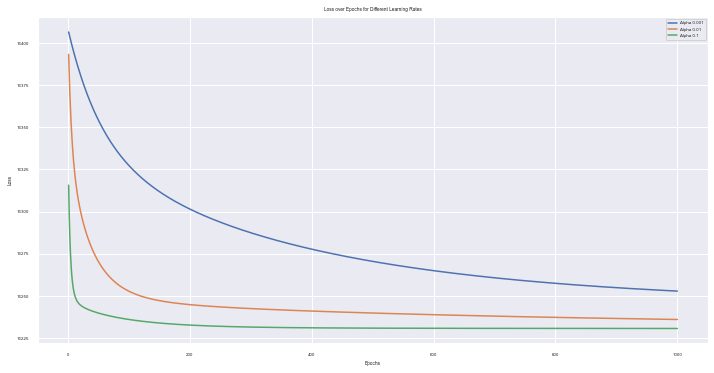

In [102]:
#To visualize
plt.figure(figsize=(12, 6))

# Plotting cost for the first model
plt.plot(range(1, iters + 1), cost_1, label=f'Alpha {alpha_1}')

# Plotting cost for the second model
plt.plot(range(1, iters + 1), cost_2, label=f'Alpha {alpha_2}')

# Plotting cost for the third model
plt.plot(range(1, iters + 1), cost_3, label=f'Alpha {alpha_3}')  

plt.title('Loss over Epochs for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()

plt.show()

In [103]:
#The model with a learning rate (alpha) of 0.001 shows gradually but slowly, implying that it may take additional times to converge to the minimum cost.
#The model with an alpha of 0.01 reduces the cost more efficiently, indicating a balanced approach between speed and stability of convergence.
#The model with an alpha of 0.1 converges the fastest, but such a rapid descent might overshoot the minimum, potentially leading to a less stable model.
#In summary, a moderate learning rate of 0.01 appears to offer a good balance, effectively minimizing the cost while maintaining consistent progress.

In [104]:
#KNN-Regression

In [105]:
#To restore the dataframe
mydf = mydf.drop('Ones', axis=1)
mydf

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
7,146.000000,71,183.6,404.000000,40189,20848,17.8,0.000000,51.7,50.8,...,33.1,25.9,50.9,24.1,89.406636,0.305159,1.889077,2.286268,48.967033,5.889179
14,2265.000000,901,171.0,440.700000,50083,490945,16.3,462.373586,37.2,35.7,...,50.6,42.5,36.5,21.4,89.038167,1.827041,2.315986,1.033625,48.188377,5.355836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3033,1962.667684,7,209.6,453.549422,45353,1843,11.4,0.000000,45.7,43.8,...,52.7,43.9,32.2,9.2,97.960199,0.000000,0.547264,0.995025,57.780612,4.664723
3034,1962.667684,85,184.4,453.549422,45180,35788,15.0,1900.078239,38.2,36.5,...,52.3,46.2,34.4,17.4,87.718617,3.168048,1.610355,1.893068,50.730567,7.404551
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192


In [106]:
#To split dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(mydf[features], mydf['TARGET_deathRate'], test_size=0.20, random_state=271)

In [107]:
#Initialize the MinMaxScaler to normalize features to a range between 0 and 1 for uniformity.
scaler=MinMaxScaler(feature_range=(0,1))

In [108]:
#Apply the scaler to the training data to learn the scaling parameters and simultaneously transform the data to the specified range.
x_train_scaled=scaler.fit_transform(x_train)

In [109]:
#Output the scaled training data
x_train_scaled

array([[0.01250777, 0.01488737, 0.38245614, ..., 0.00668386, 0.52315074,
        0.30862458],
       [0.0556976 , 0.05817826, 0.37343358, ..., 0.02748893, 0.49851495,
        0.26928994],
       [0.03316979, 0.03858962, 0.47017544, ..., 0.0059249 , 0.55354393,
        0.26431666],
       ...,
       [0.00891438, 0.01253673, 0.54786967, ..., 0.00617866, 0.56144929,
        0.37059495],
       [0.02764149, 0.03036239, 0.49824561, ..., 0.0180407 , 0.63554048,
        0.308461  ],
       [0.00110566, 0.00078355, 0.17744361, ..., 0.07779531, 0.49920806,
        0.19320144]])

In [110]:
#Apply the previously fitted scaler to the test data to make it the same scale as the training data.
x_test_scaled=scaler.transform(x_test)

In [111]:
#For k=5

In [112]:
#To create KNN model and fit
knn_model_1 = KNeighborsRegressor(n_neighbors=5).fit(x_train_scaled, y_train)

In [113]:
#To calculate score
score_knn_1 = knn_model_1.score(x_test_scaled, y_test)
score_knn_1

0.5538196473063518

In [114]:
#Predict on the test set
predictions = knn_model_1.predict(x_test_scaled)

In [115]:
#To calculate the MSE
mse_1 = mean_squared_error(y_test, predictions)
mse_1

299.742712605042

In [116]:
#For k=9

In [117]:
#To create KNN model and fit
knn_model_2 = KNeighborsRegressor(n_neighbors=9).fit(x_train_scaled, y_train)

In [118]:
#To calculate score
score_knn_2 = knn_model_2.score(x_test_scaled, y_test)
score_knn_2

0.5131924257383713

In [119]:
#Predict on the test set
predictions = knn_model_2.predict(x_test_scaled)

In [120]:
#To calculate MSE
mse_2 = mean_squared_error(y_test, predictions)
mse_2

327.03596638655455

In [121]:
#For k=15

In [122]:
#To create KNN model and fit
knn_model_3 = KNeighborsRegressor(n_neighbors=15).fit(x_train_scaled, y_train)

In [123]:
#To calculate score
score_knn_3 = knn_model_3.score(x_test_scaled, y_test)
score_knn_3

0.46222721484300033

In [124]:
#Predict on the test set
predictions = knn_model_3.predict(x_test_scaled)

In [125]:
#To calculate MSE
mse_3 = mean_squared_error(y_test, predictions)
mse_3

361.274252474323

In [126]:
#For quick comparison.
pd.DataFrame({'K=5_MSE':[mse_1],
              'K=9_MSE': [mse_2],
              'K=15_MSE': [mse_3]})

,K=5_MSE,K=9_MSE,K=15_MSE
0,299.742713,327.035966,361.274252


In [127]:
#MSE (Mean Squared Error) measures the difference between predicted and actual values.
#Lower MSE values indicate better predictions.In this case, the lowest MSE is observed when K=5. 

In [128]:
#For quick comparison.
pd.DataFrame({'K=5_Score':[score_knn_1],
              'K=9_Score': [score_knn_2],
              'K=15_Score': [score_knn_3]})

,K=5_Score,K=9_Score,K=15_Score
0,0.55382,0.513192,0.462227


In [129]:
#The score represents the model's accuracy. 
#The highest score is recorded at K=5. 

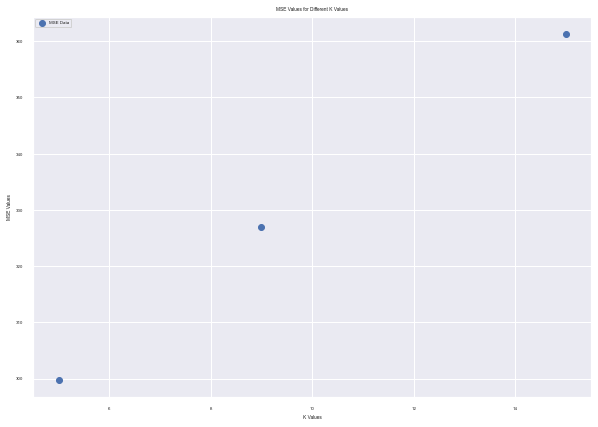

In [130]:
#To visualize
# K and MSE values
k_values = np.array([5, 9, 15])
mse_values = np.array([299.742713, 327.035966, 361.274252])

x = np.linspace(k_values.min(), k_values.max(), 100)
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting MSE values as a scatter plot
ax.scatter(k_values, mse_values, label='MSE Data')

ax.set_xlabel('K Values')
ax.set_ylabel('MSE Values')
ax.set_title('MSE Values for Different K Values')

ax.legend(loc=2)

plt.show()

In [131]:
#Considering both results, it shows that the model performs best when using 5 neighbors. 
#This data shows that as the number of neighbors in the KNN model increases, its performance decreases. 
#This trend may indicate that using too many neighbors can lead to underfitting in the model, resulting in less accurate predictions.